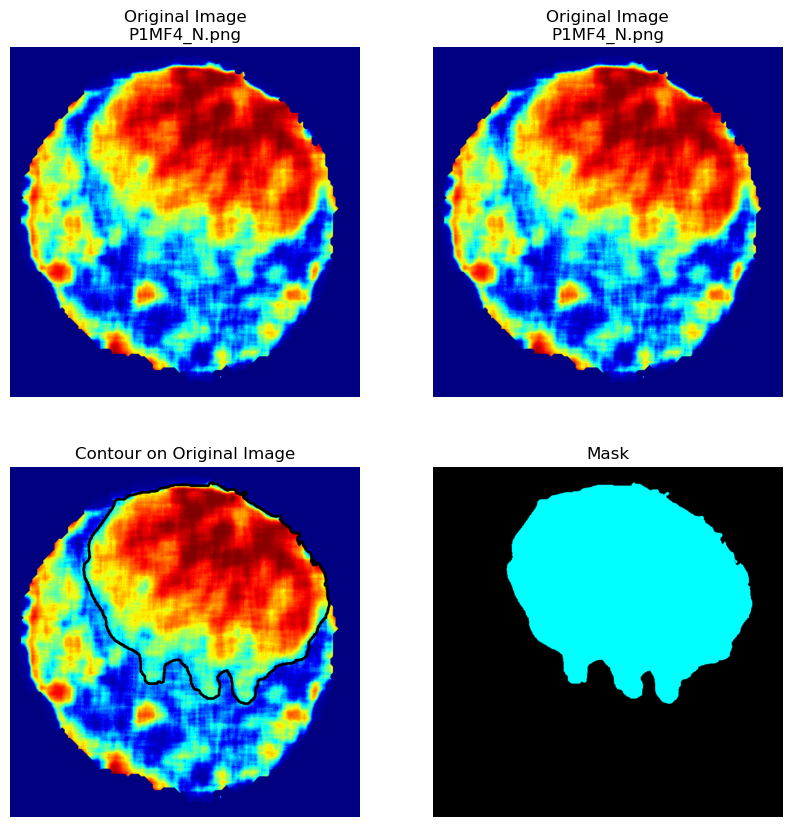

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_path = "C:\\Users\\yoni mazin\\Downloads\\heatmap_images\\P1MF4_N.png"
image = cv2.imread(image_path)

image_copy = image.copy()
contour_points = []
drawing = False

def draw_contour(event, x, y, flags, param):
    global contour_points, drawing, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        contour_points = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(image_copy, (x, y), 15, (0, 255, 255), -1)
        contour_points.append((x, y))

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Image", draw_contour)

while True:
    cv2.imshow("Image", image_copy)
    cv2.resizeWindow("Image", 750, 750)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        break

cv2.destroyAllWindows()

mask = np.zeros_like(image, dtype=np.uint8)
if len(contour_points) >= 2:
    points = np.array(contour_points, np.int32)
    cv2.fillPoly(mask, [points], (0, 255, 255))

# Save the mask
output_mask_path = "C:\\Users\\yoni mazin\\Downloads\\contours_on_heatmap\\bigger_contours\\P1MF4_N.jpg"
cv2.imwrite(output_mask_path, mask)

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image in the upper part
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title(f"Original Image\n{os.path.basename(image_path)}")
axes[0, 0].axis("off")

axes[0, 1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title(f"Original Image\n{os.path.basename(image_path)}")
axes[0, 1].axis("off")

# Display the contour on the original image in the lower left part
contour_image = image.copy()
cv2.drawContours(contour_image, [points], -1, (0, 0, 0), 30)
axes[1, 0].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("Contour on Original Image")
axes[1, 0].axis("off")

# Display the mask in the lower right part
axes[1, 1].imshow(mask, cmap='gray')
axes[1, 1].set_title("Mask")
axes[1, 1].axis("off")

plt.show()


number of pixels in the whole image with the background: 16777216
number of pixels in the mask: 5361736
ratio of pixels in the mask to pixels in the whole image: 0.3196


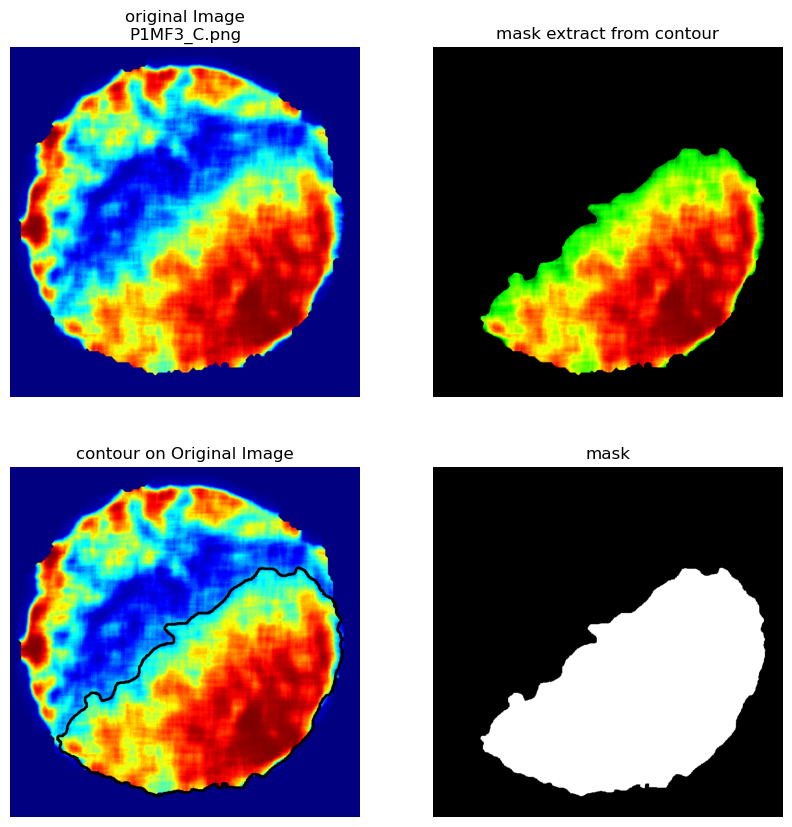

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_path = "C:\\Users\\yoni mazin\\Downloads\\heatmap_images\\P1MF3_C.png"
image = cv2.imread(image_path)

image_copy = image.copy()
contour_points = []
drawing = False

def draw_contour(event, x, y, flags, param):
    global contour_points, drawing, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        contour_points = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(image_copy, (x, y), 15, (0, 255, 255), -1)
        contour_points.append((x, y))

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Image", draw_contour)

while True:
    cv2.imshow("Image", image_copy)
    cv2.resizeWindow("Image", 750, 750)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        break

cv2.destroyAllWindows()

# Create a black background
mask = np.zeros_like(image)

# Draw the filled contour in yellow on the black background
if len(contour_points) >= 2:
    points = np.array(contour_points, np.int32)
    cv2.drawContours(mask, [points], -1, (0, 255, 255), thickness=cv2.FILLED)

# Save the yellow mask with black background
output_mask_path = "C:\\Users\\yoni mazin\\Downloads\\contours_on_heatmap\\smaller_contours\\P1MF3_C.jpg"
cv2.imwrite(output_mask_path, mask)

# Calculate the number of pixels in the whole image with the background
num_pixels_whole_image = np.prod(image.shape[:2])

# Convert the multi-channel mask to a single-channel image (grayscale)
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Calculate the number of pixels in the drawn mask
num_pixels_mask = np.count_nonzero(gray_mask)

# Calculate the ratio between the number of pixels in the mask and the number of pixels in the whole image
ratio_mask_to_whole_image = num_pixels_mask / num_pixels_whole_image if num_pixels_whole_image > 0 else 0.0

# Display the heatmap with the drawn mask
heatmap_with_mask = cv2.bitwise_and(image, mask)

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image in the upper part
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title(f"original Image\n{os.path.basename(image_path)}")
axes[0, 0].axis("off")

# Display the heatmap with the drawn mask in the upper right part
axes[0, 1].imshow(cv2.cvtColor(heatmap_with_mask, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("mask extract from contour")
axes[0, 1].axis("off")

# Display the contour on the original image in the lower left part
contour_image = image.copy()
cv2.drawContours(contour_image, [np.array(contour_points)], -1, (0, 0, 0), 30)
axes[1, 0].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("contour on Original Image")
axes[1, 0].axis("off")

# Display the yellow mask with black background in the lower right part
axes[1, 1].imshow(gray_mask, cmap='gray')
axes[1, 1].set_title("mask")
axes[1, 1].axis("off")

print(f"number of pixels in the whole image with the background: {num_pixels_whole_image}")
print(f"number of pixels in the mask: {num_pixels_mask}")
print(f"ratio of pixels in the mask to pixels in the whole image: {ratio_mask_to_whole_image:.4f}")

plt.show()
